# SEGMENTATION BY REGION GROWING

In [1]:
import sys
import matplotlib.image as mpimg
from skimage.color import rgb2gray
from RegionGrowing import * #includes all the functions we have created for this part

## Introduction

**Region growing** is a segmentation technique based on locating pixels which follows a certain criteria. It means that the selection will depend on the similarity between pixels. This is based on the idea of **homogeneity** , which defines that the region to be segmented is homogeneous from some point of view, and that it is different from other regions.

This method analyses the neighbouring pixels of initial seed points so they can be added to the region whether they meet the established conditions. The process is repeated over the entire image.

In this algorithm, we are going to compare the initial pixel with all its adjacent pixels (**connectivity of 8**).

The main **advantages** of region growing is that it is useful for images whith poor contrast of edges. Also, we can determine the seed points and the criteria we desire and  it can be very efficient as it only iterates over the necessary pixels.

Some of its **disadvantages** are that this is a local method with no global view and that it can be sensitive to noise. Moreover, our algorithm presents another limitation that will be explain later.

Along all the notebook, we are going to work with different images with different characteristics in order to see how the algorithm responds, but also we will apply different seed positions and thresholds so we can analyse the results from different points of view.

## Region growing algorithm

- **IMAGE1 : Healthy chest XRay with high contrast.**

Firstly, we are going to use an image from healthy lungs whose edges are well defined. This will be useful when comparing how the detection of edges can affect our results.

However, when we apply our algorithm in Jupyter Notebooks, it presents a limitation. If you see the code in part1_tools.py, we have called a function inside the same function, which is called recursive call of the function. It seems that its iterations are limited to 999 so if we have an image with high resolution, it is probable that it will need to iterate more times. This problem is solved with a line of code which allow us to change the limit of recursion. 

In [2]:
sys.setrecursionlimit(5000)

Anyway, if we increase a lot this limit, the kernel finally dies and it does not allow us to continue working. For this reason, we are going to use images with low resolution but it is supposed that the algorithm will not have limitations in other environments.

(Text(0.5, 1.0, 'LOW RESOLUTION HIGH CONTRAST IMAGE'),
 (-0.5, 69.5, 46.5, -0.5))

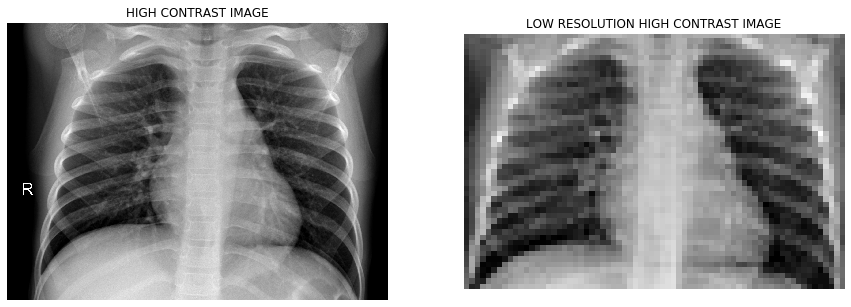

In [3]:
o_hc_image = mpimg.imread('high_contrast.jpeg') 
o_hc_image = rgb2gray(o_hc_image)

hc_image = mpimg.imread("small_high_contrast.jpg")
hc_image = rgb2gray(hc_image)

plt.figure(figsize=(15,15)) 

plt.subplot(121)
plt.imshow(o_hc_image, cmap=plt.cm.gray)
plt.title('HIGH CONTRAST IMAGE'), plt.axis('off')
plt.subplot(122)
plt.imshow(hc_image, cmap=plt.cm.gray)
plt.title('LOW RESOLUTION HIGH CONTRAST IMAGE'), plt.axis('off')

The goal is to segment two different anatomical structures which will correspond to the **segmentation of the left and the righ lung**.

On the one hand, we are going to try **different thresholds** (with similar seed position) to analyse which will fit the best for our purpose. 

What we are doing changing this t value is to increase or decrease the gray region of acceptance, so this number will be added or substracted to the original seed.

IMAGE t1
The position of the seed number 0 is 22 16
The position of the seed number 1 is 20 51
IMAGE t2
The position of the seed number 0 is 21 19
The position of the seed number 1 is 20 52
IMAGE t3
The position of the seed number 0 is 22 20
The position of the seed number 1 is 20 52


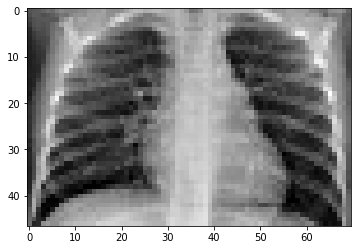

In [4]:
print("IMAGE t1")
hc_t1 = RegionGrowingP2(hc_image,2,0.1)
print("IMAGE t2")
hc_t2 = RegionGrowingP2(hc_image,2,0.25)
print("IMAGE t3")
hc_t3 = RegionGrowingP2(hc_image,2,0.5)

(Text(0.5, 1.0, 'Segmentation with t = 0.5'), (-0.5, 69.5, 46.5, -0.5))

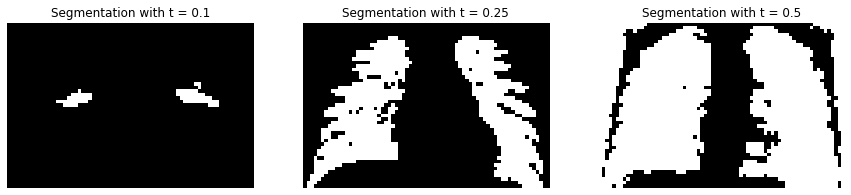

In [5]:
plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(hc_t1, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.1'), plt.axis('off')
plt.subplot(132)
plt.imshow(hc_t2, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.25'), plt.axis('off')
plt.subplot(133)
plt.imshow(hc_t3, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.5'), plt.axis('off')

**Results**

From the one hand, we can observe that with a **threshold of 0.1** we obtain a very poor segmentation. This is because we have chosen a very narrow gray region so only few pixels with so much similarity in intensity will enter in the region of interest, what is bad at a certain point for our case.

On the other hand, when we use a **threshold of 0.5** we obtain also a very poor segmentation. This is because we have chosen a very wide gray region so too much pixels will enter in the region of interest, not only those ones with an acceptable intensity and similarity for optimal segmentation.

Finally, we appreciate that the one that fits the best is the **threshold of 0.25**. There are several pixels that could not enter in the region of interest but this is due to the existance of ribs.

Now, we are going to check results with **different seed positions** (with same threshold).

IMAGE upper_part
The position of the seed number 0 is 7 20
The position of the seed number 1 is 7 50
IMAGE middle_part
The position of the seed number 0 is 22 21
The position of the seed number 1 is 20 53
IMAGE lower_part
The position of the seed number 0 is 36 10
The position of the seed number 1 is 34 60


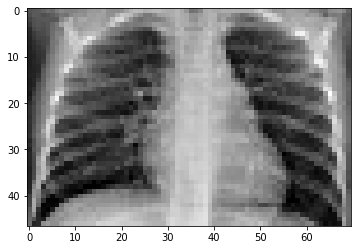

In [6]:
print("IMAGE upper_part")
upper_hc_part = RegionGrowingP2(hc_image,2,0.25)
print("IMAGE middle_part")
middle_hc_part = RegionGrowingP2(hc_image,2,0.25)
print("IMAGE lower_part")
lower_hc_part = RegionGrowingP2(hc_image,2,0.25)

(Text(0.5, 1.0, 'Seed in the lower part of the lungs'),
 (-0.5, 69.5, 46.5, -0.5))

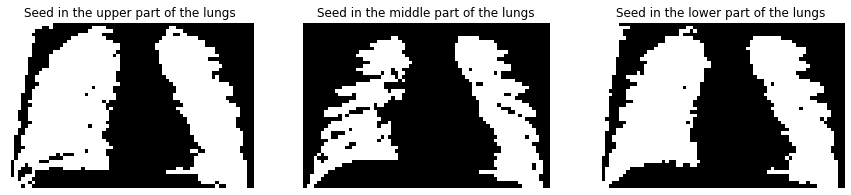

In [7]:
plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(upper_hc_part, cmap=plt.cm.gray)
plt.title('Seed in the upper part of the lungs'), plt.axis('off')
plt.subplot(132)
plt.imshow(middle_hc_part, cmap=plt.cm.gray)
plt.title('Seed in the middle part of the lungs'), plt.axis('off')
plt.subplot(133)
plt.imshow(lower_hc_part, cmap=plt.cm.gray)
plt.title('Seed in the lower part of the lungs'), plt.axis('off')

**Results** 

As an overall, we can appreciate that the position of the seed will affect to the segmentation. This is because we are trying to segment a big anatomical structure with several different gray intensities.

First, the seed placed on the **upper part of the lungs** gets a good segmentation although it does not discriminate at all the borders created by the ribs. 

However, if we place the seed in **the middle part of the lungs**, we get an even better result than before as it also shows how the ribs affect the borders of the lungs. 

Finally, when we place the seed  in the **lower part of the lungs**, we get a good segmentation with the same condition as in the upper part of the lung, the borders created by the ribs are not so marked.

Moreover, this happens with the seeds we have selected but **the segmentation will also depend on where we place the seed inside this upper, middle and lower part of the lung where pixels  from the lung can be similar to the ones of the borders or to the ones of the charasteristic lung**. If we get a bad result and we want to place the seed in an exact point, it could be a good idea to slightly change the threshold.

From the other hand, we also thought about changing the number of selected seeds just in case one seed per anatomical structure (lungs) was not enough to achieve a proper segmentation. However, as we have obtained optimal results we did not see neccesary to increase the number of selected seeds. This logic has been applied to all the notebook.

- **IMAGE2 : Health chest XRay**

Now, the image selected is also from a healthy patient but this time, it does not have as much contrast as the previous one which which will affect on the threshold selection.

(Text(0.5, 1.0, 'LOW RESOLUTION HELATHY IMAGE'), (-0.5, 59.5, 53.5, -0.5))

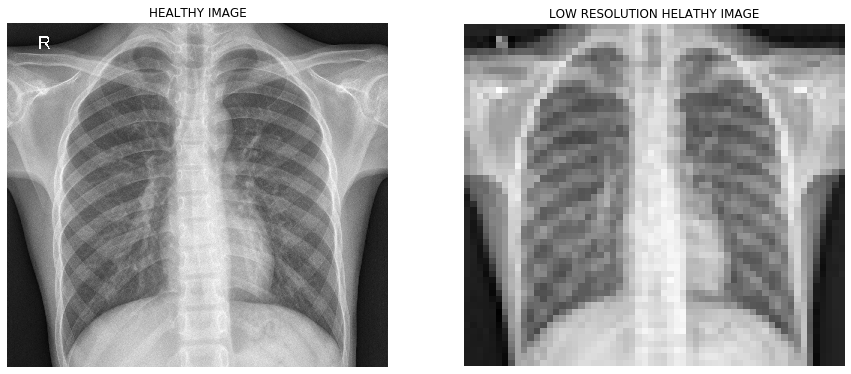

In [8]:
o_n_image = mpimg.imread('normal.jpeg') 
o_n_image = rgb2gray(o_n_image)

n_image = mpimg.imread('small_normal.jpg') 
n_image = rgb2gray(n_image)

plt.figure(figsize=(15,15)) 

plt.subplot(121)
plt.imshow(o_n_image, cmap=plt.cm.gray)
plt.title('HEALTHY IMAGE'), plt.axis('off')
plt.subplot(122)
plt.imshow(n_image, cmap=plt.cm.gray)
plt.title('LOW RESOLUTION HELATHY IMAGE'), plt.axis('off')

The goal is to segment both lungs so let's analyse **different thresholds** to observe which fits the best for this scenario.

IMAGE t1
The position of the seed number 0 is 18 16
The position of the seed number 1 is 17 41
IMAGE t2
The position of the seed number 0 is 18 17
The position of the seed number 1 is 16 40
IMAGE t3
The position of the seed number 0 is 18 16
The position of the seed number 1 is 16 41


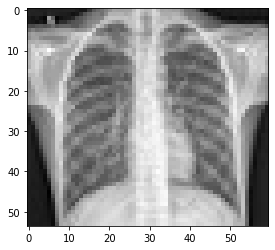

In [23]:
print("IMAGE t1")
n_t1 = RegionGrowingP2(n_image,2,0.09)
print("IMAGE t2")
n_t2 = RegionGrowingP2(n_image,2,0.19)
print("IMAGE t3")
n_t3 = RegionGrowingP2(n_image,2,0.5)

(Text(0.5, 1.0, 'Segmentation with t = 0.5'), (-0.5, 59.5, 53.5, -0.5))

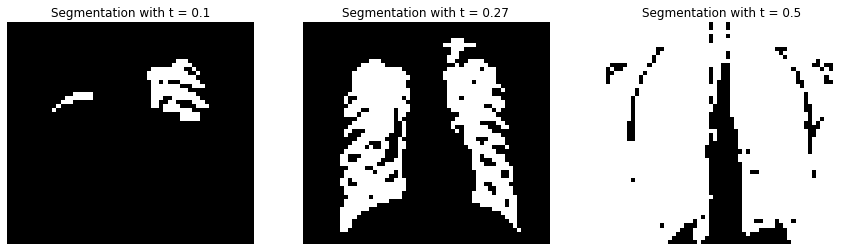

In [24]:
plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(n_t1, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.09'), plt.axis('off')
plt.subplot(132)
plt.imshow(n_t2, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.19'), plt.axis('off')
plt.subplot(133)
plt.imshow(n_t3, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.5'), plt.axis('off')

**Results**

These resulting images show the same logic as before, when we apply a low threshold, the acceptance region of gray level is narrower so not many pixels will be includeded in the region of interest which is bad for a proper segmentation. However, if we apply a high threshold, the acceptance region is wider so more pixels will enter and there will not be discriminative restriction, which is also bad for our purpose. Finally, we have found the best fit with a **threshold of 0,19**. 

Let's analyse with **different seed positions**.

IMAGE upper_part
The position of the seed number 0 is 11 18
The position of the seed number 1 is 11 38
IMAGE middle_part
The position of the seed number 0 is 23 14
The position of the seed number 1 is 22 44
IMAGE lower_part
The position of the seed number 0 is 37 16
The position of the seed number 1 is 38 44


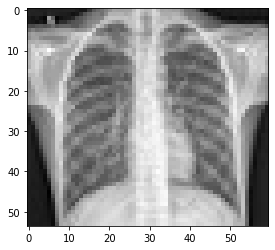

In [25]:
print("IMAGE upper_part")
upper_n_part = RegionGrowingP2(n_image,2,0.19)
print("IMAGE middle_part")
middle_n_part = RegionGrowingP2(n_image,2,0.19)
print("IMAGE lower_part")
lower_n_part = RegionGrowingP2(n_image,2,0.19)

(Text(0.5, 1.0, 'Seed in the lower part of the lungs'),
 (-0.5, 59.5, 53.5, -0.5))

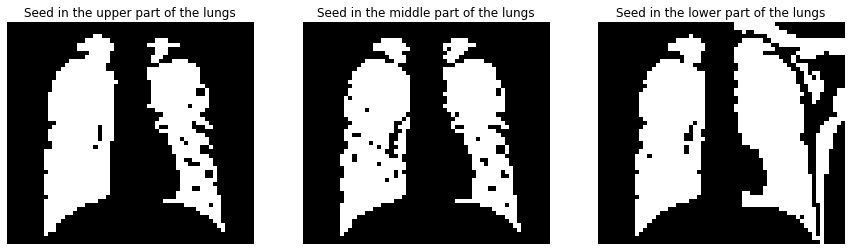

In [26]:
plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(upper_n_part, cmap=plt.cm.gray)
plt.title('Seed in the upper part of the lungs'), plt.axis('off')
plt.subplot(132)
plt.imshow(middle_n_part, cmap=plt.cm.gray)
plt.title('Seed in the middle part of the lungs'), plt.axis('off')
plt.subplot(133)
plt.imshow(lower_n_part, cmap=plt.cm.gray)
plt.title('Seed in the lower part of the lungs'), plt.axis('off')

**Results**

Here we have applied the same threshold as before but we can appreciate that although we can segment the lungs, some other structures appear as segmented although this was not our goal. This represents that for this image, the selection of the seed considerably changes the resulting segmentation. This is because some pixels from the borders have similar intensity than the ones from the lung.

- **IMAGE3 : COVID19 chest XRay with pneumonia**

In contrast, we are going to use an image whose edges are even worst defined due to the existance of pneumonia, which can be identified as a white cloud in the image. The difficulty now is related to the distinction of intensities as a great part of the image is really smooth which implies having similar intensities between the region of interest and their borders.

(Text(0.5, 1.0, 'LOW RESOLUTION PNEUMONIA IMAGE'), (-0.5, 59.5, 50.5, -0.5))

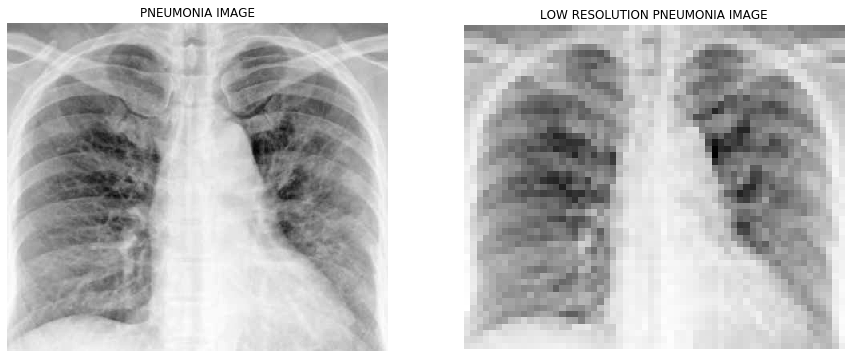

In [27]:
o_p_image = mpimg.imread('pneumonia.jpg') 
o_p_image = rgb2gray(o_p_image)

p_image = mpimg.imread("small_pneumonia.jpg")
p_image = rgb2gray(p_image)

plt.figure(figsize=(15,15)) 

plt.subplot(121)
plt.imshow(o_p_image, cmap=plt.cm.gray)
plt.title('PNEUMONIA IMAGE'), plt.axis('off')
plt.subplot(122)
plt.imshow(p_image, cmap=plt.cm.gray)
plt.title('LOW RESOLUTION PNEUMONIA IMAGE'), plt.axis('off')

The goal, as before, is to **segment the the left and the righ lung**. So firstly, we are going to try **different thresholds**.

IMAGE t1
The position of the seed number 0 is 20 17
The position of the seed number 1 is 15 43
IMAGE t2
The position of the seed number 0 is 19 17
The position of the seed number 1 is 16 43
IMAGE t3
The position of the seed number 0 is 19 17
The position of the seed number 1 is 15 44


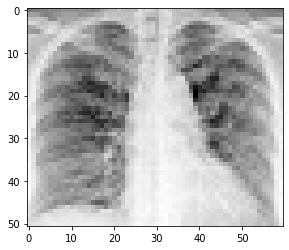

In [34]:
print("IMAGE t1")
p_t1 = RegionGrowingP2(p_image,2,0.1)
print("IMAGE t2")
p_t2 = RegionGrowingP2(p_image,2,0.35)
print("IMAGE t3")
p_t3 = RegionGrowingP2(p_image,2,0.5)

(Text(0.5, 1.0, 'Segmentation with t = 0.5'), (-0.5, 59.5, 50.5, -0.5))

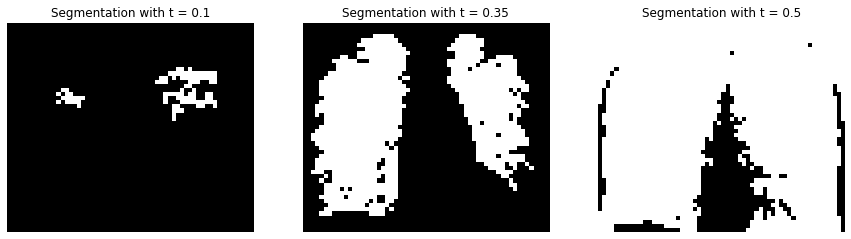

In [36]:
plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(p_t1, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.1'), plt.axis('off')
plt.subplot(132)
plt.imshow(p_t2, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.35'), plt.axis('off')
plt.subplot(133)
plt.imshow(p_t3, cmap=plt.cm.gray)
plt.title('Segmentation with t = 0.5'), plt.axis('off')

**Results**

In this case, the selection of the thresholds could be more complicated and more sensitive. That it is why we could get worse segmentations because when we try with different thresholds, the positions of the seed can influence a lot (as we will see with the following images). Anyway, we can see that again the reasoning of how changes in threshold affect the gray region and the segmentation, is the same. The **best result is given by 0.35** although we do not get so much differentiation with the ribs as it happened before.

This threshold can greatly vary depending on the selection of the seeds, so maybe if we choose other part of the lung, the threshold should change.

Let's analyse it, **modifying the values of the seed position** (with the same threshold value).

IMAGE upper_part
The position of the seed number 0 is 12 12
The position of the seed number 1 is 9 47
IMAGE middle_part
The position of the seed number 0 is 19 16
The position of the seed number 1 is 19 39
IMAGE lower_part
The position of the seed number 0 is 38 10
The position of the seed number 1 is 35 52


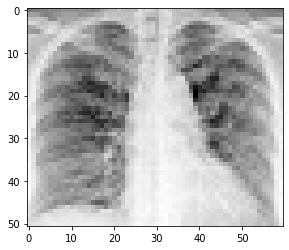

In [37]:
print("IMAGE upper_part")
upper_p_part = RegionGrowingP2(p_image,2,0.38)
print("IMAGE middle_part")
middle_p_part = RegionGrowingP2(p_image,2,0.38)
print("IMAGE lower_part")
lower_p_part = RegionGrowingP2(p_image,2,0.38)

(Text(0.5, 1.0, 'Seed in the lower part of the lungs'),
 (-0.5, 59.5, 50.5, -0.5))

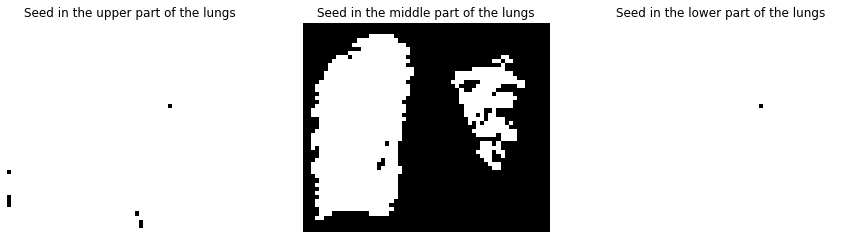

In [38]:
plt.figure(figsize=(15,15)) 

plt.subplot(131)
plt.imshow(upper_p_part, cmap=plt.cm.gray)
plt.title('Seed in the upper part of the lungs'), plt.axis('off')
plt.subplot(132)
plt.imshow(middle_p_part, cmap=plt.cm.gray)
plt.title('Seed in the middle part of the lungs'), plt.axis('off')
plt.subplot(133)
plt.imshow(lower_p_part, cmap=plt.cm.gray)
plt.title('Seed in the lower part of the lungs'), plt.axis('off')

**Results**

In these images, we can observe how sensible the modification of seed is. This is due to the highly similarity in intensity along the image. We have to choose carefully which seed we select as it should be preferably located in a region that is slightly more intense or more characteristic from the region of interest.

This is the reason why when we choose the upper and the lower part of the image we cannot get a proper segmentation. But in the middle region, if we select carefully the seeds, we can get good results.

As these images are more sensible to changes, we have tried to analyse which thresholds should be chosen depending on the position of the initial seeds but we did not obtain optimal results. If we selected slighltly different seeds, the selection of the threshold acted completely different so it was very difficult to try among different thresholds. 

## CONCLUSIONS

To conclude, we are going to compare among the different studied scenarios.

(Text(0.5, 1.0, 'SEGMENTED PNEUMONIA IMAGE'), (-0.5, 59.5, 50.5, -0.5))

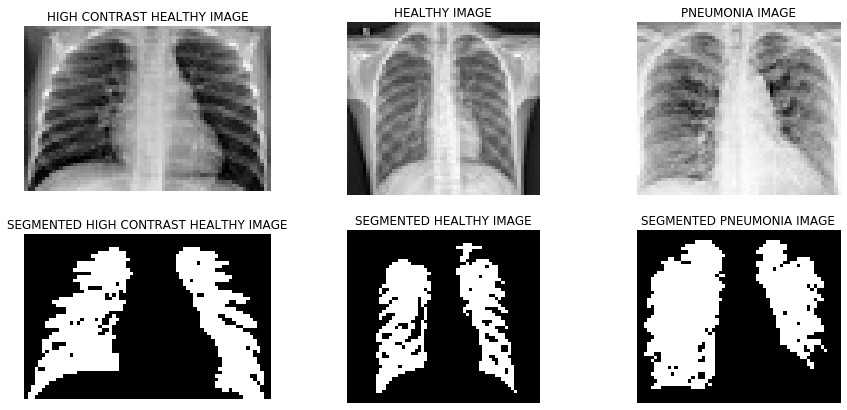

In [39]:
plt.figure(figsize=(15,7)) 

plt.subplot(231)
plt.imshow(hc_image, cmap=plt.cm.gray)
plt.title('HIGH CONTRAST HEALTHY IMAGE'), plt.axis('off')

plt.subplot(232)
plt.imshow(n_image, cmap=plt.cm.gray)
plt.title('HEALTHY IMAGE'), plt.axis('off')

plt.subplot(233)
plt.imshow(p_image, cmap=plt.cm.gray)
plt.title('PNEUMONIA IMAGE'), plt.axis('off')

plt.subplot(234)
plt.imshow(hc_t2, cmap=plt.cm.gray)
plt.title('SEGMENTED HIGH CONTRAST HEALTHY IMAGE'), plt.axis('off')

plt.subplot(235)
plt.imshow(n_t2, cmap=plt.cm.gray)
plt.title('SEGMENTED HEALTHY IMAGE'), plt.axis('off')

plt.subplot(236)
plt.imshow(p_t2, cmap=plt.cm.gray)
plt.title('SEGMENTED PNEUMONIA IMAGE'), plt.axis('off')

Firstly, we can appreciate that the best results are obtained with a **threshold value of 0.19 for the first image, 0.27 for the second and 0.35 for the third.** We can see how different the selection of the threshold is due to the different gray distribution inside the image. 

As the first one, has highly diffences between intensities from different anatomical structures, the region should be narrow to select only the very similar intensities of the region of interest. This condition will change for the other two images. As the second one has similiar intensities along the image, the pixels should be really close to the initial seed to take only the region of interest. Finally, in the third one what probably happens is that as we also have some areas with greater intensities and others with less that belongs to the same anatomical structure, we should increase the gray region in order to take everything we intend to.

We could also observe how sensible the selection of the position of the seed is. In the first image, the region of interest has really different intensities from the rest of structures so it is not so important where to locate the seed, but for the other two we will have to be more careful because some pixels could have similar intensities than other parts so it will not discriminate so well. This is even worse, with the image with pneumonia as this condition affects the image to be more smooth and white along all the image.

Then, if we want **to get a proper segmentation we will have to consider how the gray intensity is distributed; how different the region of interest and their borders are so we could select an optimal threshold but also place our seed in a good position.**

### References

Chapter 4.

https://en.wikipedia.org/wiki/Region_growing#The_advantages_and_disadvantages_of_region_growing

### Contribution

Code has been done by three of us in different periodic meetings in which code has been created, improved, checked and modified. Regarding explanation of code and the creation of notebook Sofia is the person in charge of it.